# Hero.Coli Data Analysis Summary

List of readworthy results from Hero.Coli data analysis.

## Table of Contents

[Preparation](#preparation)
1. [Google form analysis](#gform)
2. [Game sessions](#sessions)
3. [Per session and per user analysis](#peruser)
4. [User comparison](#usercomp)
5. [Game map](#map)
    1. [List of questions](#qlist)
    2. [English](#enform)
    3. [French](#frform)
    4. [Language selection](#langsel)
3. [Basic operations](#basicops)
4. [Checkpoint / Question matching](#checkquestmatch)

# Preparation
<a id=preparation />

In [57]:
%run "../Functions/4. User comparison.ipynb"
%run "../Utilities/Plot.ipynb"

C:\Users\Mikael\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (24,32,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 1. Google form analysis
<a id=gform />

# 2. Game sessions
<a id=sessions />

# 3. Per session and per user analysis
<a id=peruser />

# 4. User comparison
<a id=usercomp />

# 5. Game map
<a id=map />

# Player filtering

In [58]:
#players = df152.loc[:, playerFilteringColumns]
players = safeGetNormalizedRedMetricsCSV( df152 )
players.head(1)

,coordinates,customData,customData.biobrick,customData.chapter,customData.controls,customData.count,customData.device,customData.devices,customData.dnabit,customData.duration,...,playerCountry,playerCustomData,playerExternalId,playerGender,sessionId,playerRegion,section,serverTime,type,userTime
0,"[-229, -608]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,b724663c-b32a-4079-9f8f-896762b272d1,NaN,NaN,2017-04-12T08:57:48.448Z,start,2017-04-12T08:57:49.752Z


In [59]:
#players = players.dropna(how='any')
#players.head(1)
#df152.head(1)

In [60]:
players.shape[0]

23813

In [61]:
players = players[~players['userId'].isin(excludedIDs)];
players.shape[0]

23797

## Sessions (filtered)

In [62]:
sessionscount = players["sessionId"].nunique()
sessionscount

428

## Sessions of dev IDs

## Unique players

In [63]:
uniqueplayers = players['userId']
uniqueplayers = uniqueplayers.unique()
uniqueplayers.shape[0]

244

In [64]:
#uniqueplayers

## Unique platforms

In [65]:
uniqueplatforms = players['customData.platform'].unique()
uniqueplatforms

array(['"webglplayer"', nan, '"windowsplayer"', '"windowseditor"',
       '"android"', '"osxeditor"', '"linuxplayer"', '"osxplayer"'], dtype=object)

## Checkpoints passed / furthest checkpoint (unfiltered)

In [66]:
checkpoints = df152.loc[:, checkpointsRelevantColumns]
checkpoints = checkpoints[checkpoints['type']=='reach'].loc[:,['section','sessionId']]
checkpoints = checkpoints[checkpoints['section'].str.startswith('tutorial', na=False)]
checkpoints = checkpoints.groupby("sessionId")
checkpoints = checkpoints.max()
checkpoints.head()

,section
sessionId,
002caea8-9a7f-436e-be1d-aa15eb0e422b,tutorial1.Checkpoint14
01eefc09-2d17-4669-9b66-1873ded5ba7e,tutorial1.Checkpoint00
0229d38c-72e9-47d2-b5eb-9adc774e9be9,tutorial1.Checkpoint00
02c951e6-1e39-4ed7-a884-acc38757a473,tutorial1.Checkpoint00
0405e80c-bfb5-4c63-af00-ed60f6e80c55,tutorial1.Checkpoint00


In [67]:
maxCheckpointTable = pd.DataFrame({"maxCheckpoint" : checkpoints.values.flatten()})
maxCheckpointCounts = maxCheckpointTable["maxCheckpoint"].value_counts()
maxCheckpointCounts['Start'] = None
maxCheckpointCounts = maxCheckpointCounts.sort_index()
print('\nmaxCheckpointCounts=\n{0}'.format(str(maxCheckpointCounts)))


maxCheckpointCounts=
Start                     None
tutorial1.Checkpoint00      41
tutorial1.Checkpoint01      85
tutorial1.Checkpoint02      13
tutorial1.Checkpoint03       4
tutorial1.Checkpoint04      29
tutorial1.Checkpoint05       5
tutorial1.Checkpoint06       8
tutorial1.Checkpoint07       2
tutorial1.Checkpoint08       2
tutorial1.Checkpoint09       1
tutorial1.Checkpoint10       1
tutorial1.Checkpoint13       3
tutorial1.Checkpoint14      29
Name: maxCheckpoint, dtype: object


In [68]:
maxCheckpointCountsTable = pd.DataFrame({"maxCheckpoint" : maxCheckpointCounts.values})
maxCheckpointCountsTableCount = maxCheckpointCountsTable.sum(0)[0]
maxCheckpointCountsTableCount

223.0

In [69]:
checkpoints.count()

section    223
dtype: int64

In [70]:
maxCheckpointCountsTable.head()

,maxCheckpoint
0,None
1,41
2,85
3,13
4,4


In [71]:
maxCheckpointCountsTable.describe()

,maxCheckpoint
count,13
unique,10
top,29
freq,2


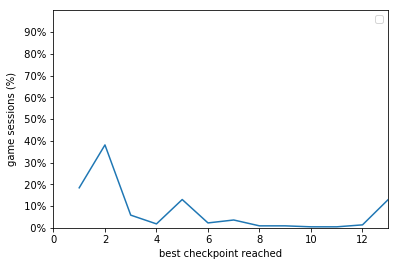

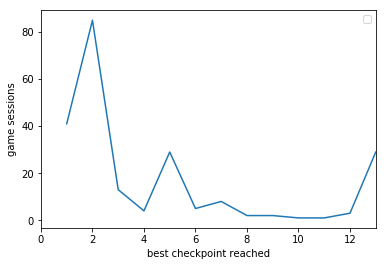

In [72]:
genericTreatment( maxCheckpointCountsTable, "best checkpoint reached", "game sessions", 0, maxCheckpointCountsTableCount, False, True )

## Session starts

In [73]:
#starts = df152.loc[:, checkpointsRelevantColumns]
#starts = checkpoints[checkpoints['type']=='start'].loc[:,['playerId']]
#starts = checkpoints[checkpoints['section'].str.startswith('tutorial', na=False)]
#starts = checkpoints.groupby("playerId")
#starts = checkpoints.max()
#starts.head()


fullMaxCheckpointCountsTable=
   fullMaxCheckpoint
0                205
1                 41
2                 85
3                 13
4                  4
5                 29
6                  5
7                  8
8                  2
9                  2
10                 1
11                 1
12                 3
13                29


,fullMaxCheckpoint
count,14.0
unique,11.0
top,29.0
freq,2.0


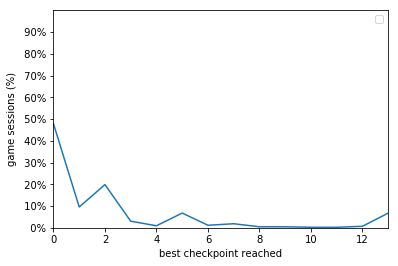

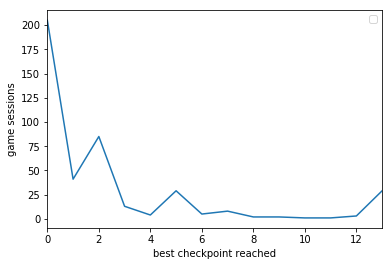

In [74]:
startTutorial1Count = sessionscount
neverReachedGameSessionCount = startTutorial1Count - maxCheckpointCountsTableCount
fullMaxCheckpointCounts = maxCheckpointCounts
fullMaxCheckpointCounts['Start'] = neverReachedGameSessionCount
fullMaxCheckpointCountsTable = pd.DataFrame({"fullMaxCheckpoint" : fullMaxCheckpointCounts.values})

genericTreatment( fullMaxCheckpointCountsTable, "best checkpoint reached", "game sessions", 0, startTutorial1Count, False, True )

print('\nfullMaxCheckpointCountsTable=\n{0}'.format(fullMaxCheckpointCountsTable))
fullMaxCheckpointCountsTable.describe()

## Duration

Duration of playing sessions

In [75]:
durations = players.groupby("sessionId").agg({ "serverTime": [ np.min, np.max  ] })
durations["duration"] = pd.to_datetime(durations["serverTime"]["amax"]) - pd.to_datetime(durations["serverTime"]["amin"])
durations["duration"] = durations["duration"].map(lambda x: np.timedelta64(x, 's'))
durations = durations.sort_values(by=['duration'], ascending=[False])
durations.head()

serverTime  \
                                                          amin   
sessionId                                                        
b5ab445a-56c9-4c5b-a6d0-86e8a286cd81  2017-04-28T09:54:53.585Z   
5d2d172d-1f63-4519-ac8b-8528acbd4843  2017-08-03T05:03:00.472Z   
e3c8f8bb-0d97-48db-a3e4-c7c0cbf3f6ba  2017-08-16T14:56:03.494Z   
c79eafe9-a49b-4401-8a0c-3ab212648ad3  2017-06-14T14:57:50.914Z   
ec968ba0-110c-4f80-930e-12911fe442c7  2017-07-04T11:25:26.450Z   

                                                                \
                                                          amax   
sessionId                                                        
b5ab445a-56c9-4c5b-a6d0-86e8a286cd81  2017-06-27T13:39:05.834Z   
5d2d172d-1f63-4519-ac8b-8528acbd4843  2017-08-05T06:11:57.806Z   
e3c8f8bb-0d97-48db-a3e4-c7c0cbf3f6ba  2017-08-18T13:00:57.281Z   
c79eafe9-a49b-4401-8a0c-3ab212648ad3  2017-06-15T16:50:31.180Z   
ec968ba0-110c-4f80-930e-12911fe442c7  2017-07-05T12:34:19.476Z   

                                             duration  
                                                       
sessionId                                              
b5ab445a-56c9-4c5b-a6d0-86e8a286cd81 60 days 03:44:12  
5d2d172d-1f63-4519-ac8b-8528acbd4843  2 days 01:08:57  
e3c8f8bb-0d97-48db-a3e4-c7c0cbf3f6ba  1 days 22:04:53  
c79eafe9-a49b-4401-8a0c-3ab212648ad3  1 days 01:52:40  
ec968ba0-110c-4f80-930e-12911fe442c7  1 days 01:08:53

Duration plot

serverTime  \
                                                          amin   
sessionId                                                        
ec968ba0-110c-4f80-930e-12911fe442c7  2017-07-04T11:25:26.450Z   
c612ae53-4a70-473f-aa35-ace3a5e797f0  2017-08-13T14:47:30.493Z   
ee11f881-6206-4fa9-93e4-4156617ec72e  2017-06-21T15:40:26.577Z   
3ac0a2db-f21d-4bd0-bd9e-3a77265f19f6  2017-06-27T07:44:41.963Z   
afd19d25-3293-4ae2-bc2b-5eb8de17f66d  2017-06-23T10:59:50.764Z   

                                                                \
                                                          amax   
sessionId                                                        
ec968ba0-110c-4f80-930e-12911fe442c7  2017-07-05T12:34:19.476Z   
c612ae53-4a70-473f-aa35-ace3a5e797f0  2017-08-13T23:44:15.289Z   
ee11f881-6206-4fa9-93e4-4156617ec72e  2017-06-21T22:49:34.830Z   
3ac0a2db-f21d-4bd0-bd9e-3a77265f19f6  2017-06-27T12:15:03.612Z   
afd19d25-3293-4ae2-bc2b-5eb8de17f66d  2017-06-23T15:28:28.423Z   

                                            duration duration_seconds  \
                                                                        
sessionId                                                               
ec968ba0-110c-4f80-930e-12911fe442c7 1 days 01:08:53             4133   
c612ae53-4a70-473f-aa35-ace3a5e797f0 0 days 08:56:44            32204   
ee11f881-6206-4fa9-93e4-4156617ec72e 0 days 07:09:08            25748   
3ac0a2db-f21d-4bd0-bd9e-3a77265f19f6 0 days 04:30:21            16221   
afd19d25-3293-4ae2-bc2b-5eb8de17f66d 0 days 04:28:37            16117   

                                     duration_rank  
                                                    
sessionId                                           
ec968ba0-110c-4f80-930e-12911fe442c7          37.0  
c612ae53-4a70-473f-aa35-ace3a5e797f0           1.0  
ee11f881-6206-4fa9-93e4-4156617ec72e           2.0  
3ac0a2db-f21d-4bd0-bd9e-3a77265f19f6           3.0  
afd19d25-3293-4ae2-bc2b-5eb8de17f66d           4.0

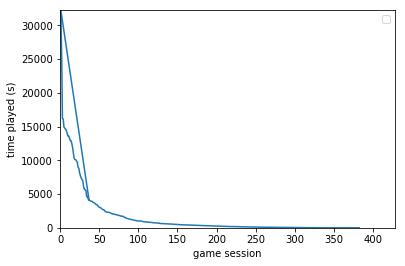

In [76]:
durations.loc[:,'duration']
durations = durations[4:]
durations["duration_seconds"] = durations["duration"].map(lambda x: pd.Timedelta(x).seconds)
maxDuration = np.max(durations["duration_seconds"])
durations["duration_rank"] = durations["duration_seconds"].rank(ascending=False)
durations.plot(x="duration_rank", y="duration_seconds")
plt.xlabel("game session")
plt.ylabel("time played (s)")
plt.legend('')
plt.xlim(0, sessionscount)
plt.ylim(0, maxDuration)
durations["duration_seconds"].describe()
durations.head()